> Object Detection

    YOLO로 대표되는 1-stage detector와 Faster R-CNN으로 대표되는 2-stage detector로 크게 나눌 수 있으며, 이들의 차이는 detector 앞단에 후보 지역을 추천하는 RPN(Region Proposal Network)존재 여부
    
    일반적으로 1-stage detector는 추론속도가 빨라 real-time task에 주로 사용되는 반면 정확도 측면에서 2-stage detector에 비해 다소 뒤떨어짐

> Transformer
    
    발표 당시엔 NLP task를 위한 모델이었음
    
    기존 RNN 기반의 encoder-decodedd 구조에서 RNN 모듈을 버리고 attetion만을 이용하여 번역 등의 task를 수행하는 모델 구조
    
     embeding된 input sequence를 넣어서 encoder로 transform을 하고 그 transform된 embeding을 decoder에 넣어서 decoder에 들어간 input과 attention을 한 번 더 수행하여 출력하는 구조(첫 번째 사진 참고)
     
     

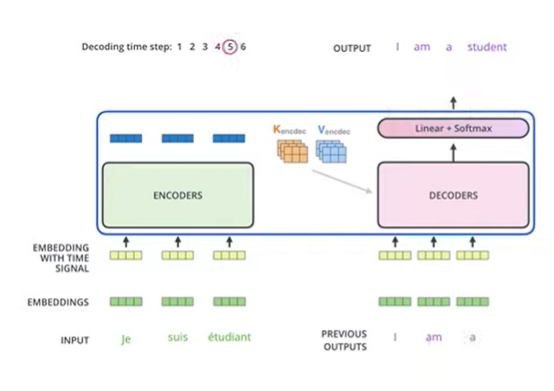

> DETR(DEtection with TRansformer)

    Transformer와 이분 매칭(Bipartile-matching) 기반의 새로운 detection 구조
    
    Object detection을 direct set prediction의 문제로 접근하며, end-to-end 모델로서 geometric prior(RPN,NMS같이 hand-crafted 엔지니어링)가 필요하지 않음
    
    구조적으로 간결함에도 다른 task에 확장성이 높고(e.g. panoptic segmentation), attetion mechanism에 의해 global한 정보를 이용함에 따라 큰 물체 탐지에 대해서 Faster R-CNN에 비해 더 높은 성능을 보여줌
    
    아래 그림 : 이미지를 CNN에 태운 결과인 set of image features 즉, feature map을 가지고 transformer encoder-decoder에서 attention 기반의 학습을 수행하고, transformer encoder-decoder와 set-prediction을 사용하기 때문에 NMS가 필요없음
    중복 없는 set 기반 예측이 진행될 것

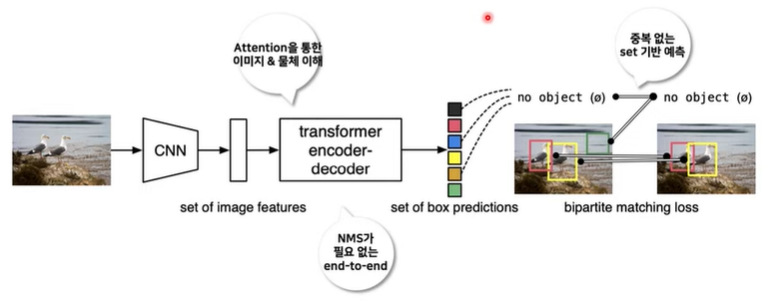

> detail of DETR

    아래 그림의 1~2번을 보면
    : encoder는 attetion mechanism을 기반으로 feature map의 pixel과 pixel간의 관계를 학습, attention mechanism을 기반으로 하기 때문에 가능함.
    
    Locality 중심의 CNN과 다르게 global한 정보를 학습함으로써 이미지를 이해하고 특히 object detection task에 맞게 학습됨으로써 이미지 내의 object의 위치, 관계 등 도한 학습하게 됨
     
    1. 이미지를 Transformer 입력 형태로 변환
    2. Positional Encoding. Transformer architecture와 동일하게 positional encoding을 더하여 입력
    3. Self-Attention. encoder나 decoder에 사용되는 attention mechanism은 입력된 각 픽셀들 간 어떠한 관계가 있는지를 global하게 학습. pixel을 전부 다 봄
    4. FFN. output에 대한 nermalization 및 학습 보조
    
    두 번째 사진, 세 번째 사진 : 
    input 같은 경우는 image를 CNN Backbone(논문에서는 ResNet)에 태워서 feture map을 얻음
    
    얻은 feature map을 1x1 convolution layer에 태워, 미리 설정한 토큰 임베딩 차원(d=256)으로 축소
    
    최종적으로 sequential한 token을 마련해주기 위해서 dxHW로 flatten 수행. 어떤 특정 pixel위치에 있는 모든 channel들을 가져오게 됨. 그럼 오른쪽처럼 하나의 token의 차원은 d차원의 vector가 됨. 결과적으로 transformer에 입력으로 사용할 수 있는 sequence를 얻음
    
    

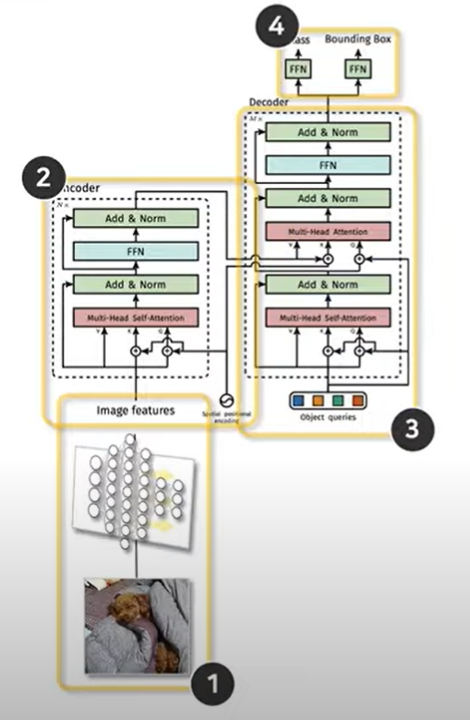
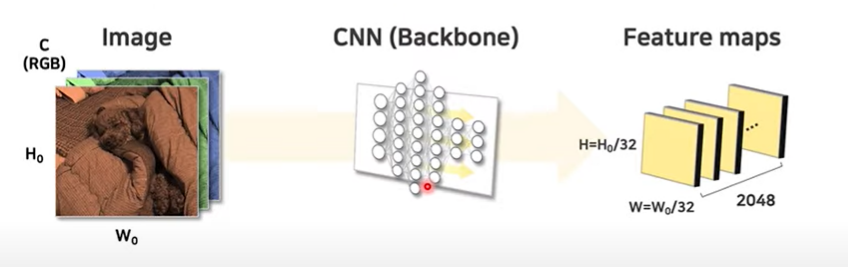
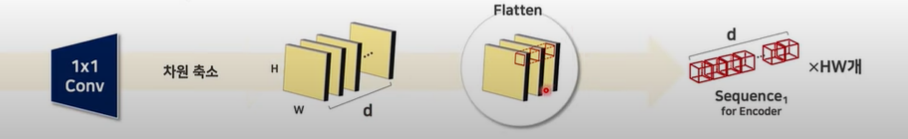